In [11]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import numpy as np
import functions.eddy_feedback as ef

# Daily-calculated EFP

In [12]:
jra_path = '/home/links/ct715/data_storage/reanalysis/jra55_daily'

ds = xr.open_mfdataset(f'{jra_path}/jra55_uvtw_ubar_ep.nc')
nh_efp_1979 = ef.calculate_efp(ds, data_type='reanalysis', which_div1='div1')
sh_efp_1979 = ef.calculate_efp(ds, data_type='reanalysis', which_div1='div1', calc_south_hemis=True)

print('Daily 1979-2016:')
print(nh_efp_1979)
print(sh_efp_1979)
print()

jra_path = '/home/links/ct715/data_storage/reanalysis/jra55_daily'

ds = xr.open_mfdataset(f'{jra_path}/jra55_uvtw_ubar_ep.nc')
nh_efp_1958 = ef.calculate_efp(ds, data_type='reanalysis_fulltime', which_div1='div1')
sh_efp_1958 = ef.calculate_efp(ds, data_type='reanalysis_fulltime', which_div1='div1', calc_south_hemis=True)

print('Daily 1958-2016:')
print(nh_efp_1958)
print(sh_efp_1958)

Daily 1979-2016:
0.3872
0.2116

Daily 1958-2016:
0.3268
0.1793


# NH vs SH EFPs

In [13]:
efp_df = pd.read_csv('./data/daily_efp_8models.csv', index_col=0)

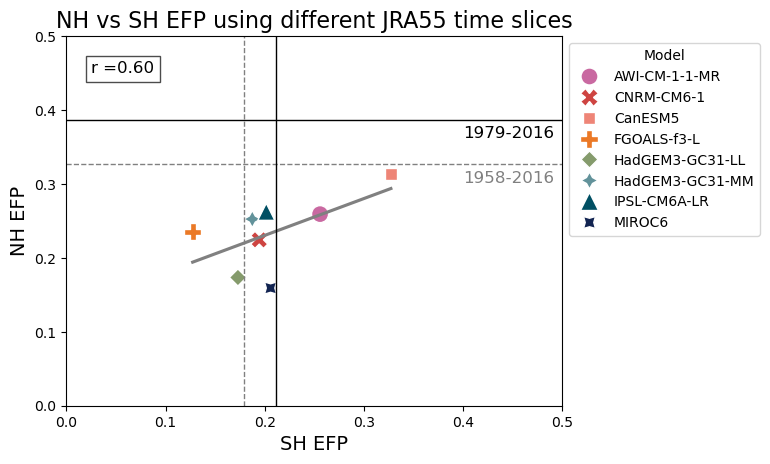

In [14]:
# colours
from pypalettes import load_cmap
cmap = load_cmap("Cross")
models = efp_df['model'].unique()
colors = [cmap(i / (len(models) - 1)) for i in range(len(models))]
palette = dict(zip(models, colors))

sns.regplot(data=efp_df, x='efp_sh', y='efp_nh', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None)
sns.scatterplot(data=efp_df, x='efp_sh', y='efp_nh', hue='model', style='model', s=150, palette=palette)

# Insert Pearson's correlation
r, p = sp.stats.pearsonr(x=efp_df['efp_nh'], y=efp_df['efp_sh'])
ax = plt.gca()
plt.text(.05, .9, "r ={:.2f}".format(r), transform=ax.transAxes, 
         bbox=dict(facecolor="white", alpha=0.7), fontsize=12)

plt.ylabel('NH EFP', fontsize=14)
plt.xlabel('SH EFP', fontsize=14)
# plt.title('500 hPa EFP', fontsize=16)
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)

plt.axvline(sh_efp_1958, color='gray', linestyle='--', linewidth=1)
plt.axhline(nh_efp_1958, color='gray', linestyle='--', linewidth=1)
plt.text(0.4, nh_efp_1958 - 0.025, '1958-2016', color='gray', fontsize=12)

plt.axvline(sh_efp_1979, color='k', linewidth=1)
plt.axhline(nh_efp_1979, color='k', linewidth=1)
plt.text(0.4, nh_efp_1979 - 0.025, '1979-2016', color='k', fontsize=12)

plt.legend(bbox_to_anchor=(1,1), title='Model')

plt.title('NH vs SH EFP using different JRA55 time slices', fontsize=16)
plt.show()

# Original EFP

In [15]:
og_jra_path = '/home/links/ct715/data_storage/reanalysis/srip_datasets'
og_ds = xr.open_mfdataset(f'{og_jra_path}/JRA55_srip_ubar_div1.nc')

og_nh_efp_1979 = ef.calculate_efp(og_ds, data_type='reanalysis', which_div1='div1_pr')
og_sh_efp_1979 = ef.calculate_efp(og_ds, data_type='reanalysis', which_div1='div1_pr', calc_south_hemis=True)

print('Sub-daily 1979-2016:')
print(og_nh_efp_1979)
print(og_sh_efp_1979)
print()

og_nh_efp_1958 = ef.calculate_efp(og_ds, data_type='reanalysis_fulltime', which_div1='div1_pr')
og_sh_efp_1958 = ef.calculate_efp(og_ds, data_type='reanalysis_fulltime', which_div1='div1_pr', calc_south_hemis=True)

print('Sub-daily 1958-2016:')
print(og_nh_efp_1958)
print(og_sh_efp_1958)


Sub-daily 1979-2016:
0.4502
0.3584

Sub-daily 1958-2016:
0.3872
0.2975


In [16]:
og_pamip = pd.read_csv('/home/links/ct715/eddy_feedback/chapter1/efp_random/data/non-regridded_efp.csv', index_col=0)
og_pamip = og_pamip.drop([4,6]).reset_index(drop=True)

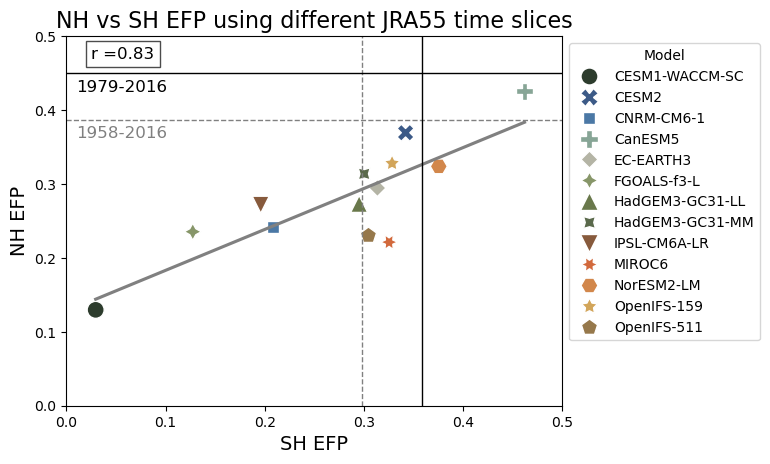

In [17]:
from pypalettes import load_cmap
cmap = load_cmap("lestaque_aux_toits_rouges")
models = og_pamip['model'].unique()
colors = [cmap(i / (len(models) - 1)) for i in range(len(models))]
palette = dict(zip(models, colors))


sns.regplot(data=og_pamip, x='efp_sh', y='efp_nh', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None)
sns.scatterplot(data=og_pamip, x='efp_sh', y='efp_nh', hue='model', style='model', s=150, palette=palette)


# Insert Pearson's correlation
r, p = sp.stats.pearsonr(x=og_pamip['efp_nh'], y=og_pamip['efp_sh'])
ax = plt.gca()
plt.text(.05, .94, "r ={:.2f}".format(r), transform=ax.transAxes, 
         bbox=dict(facecolor="white", alpha=0.7), fontsize=12)

plt.ylabel('NH EFP', fontsize=14)
plt.xlabel('SH EFP', fontsize=14)
# plt.title('500 hPa EFP', fontsize=16)
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)

plt.axvline(og_sh_efp_1958, color='gray', linestyle='--', linewidth=1)
plt.axhline(og_nh_efp_1958, color='gray', linestyle='--', linewidth=1)
plt.text(0.01, og_nh_efp_1958 - 0.025, '1958-2016', color='gray', fontsize=12)

plt.axvline(og_sh_efp_1979, color='k', linewidth=1)
plt.axhline(og_nh_efp_1979, color='k', linewidth=1)
plt.text(0.01, og_nh_efp_1979 - 0.025, '1979-2016', color='k', fontsize=12)

plt.legend(bbox_to_anchor=(1,1), title='Model')

plt.title('NH vs SH EFP using different JRA55 time slices', fontsize=16)
plt.show()

# NH vs SH with original EFP

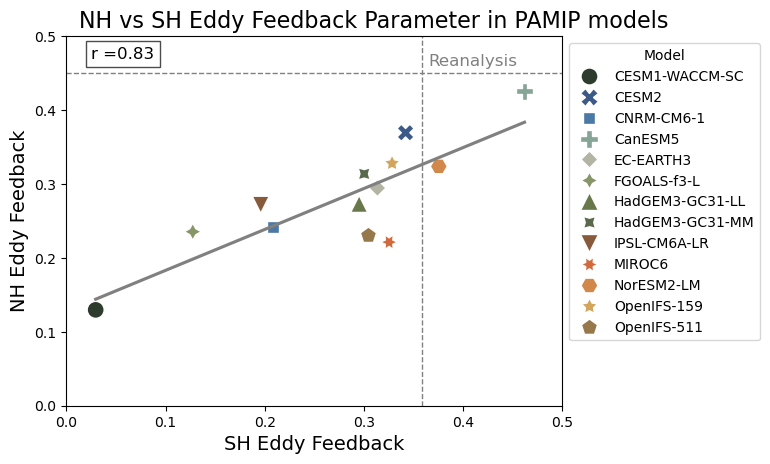

In [18]:
sns.regplot(data=og_pamip, x='efp_sh', y='efp_nh', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None)
sns.scatterplot(data=og_pamip, x='efp_sh', y='efp_nh', hue='model', style='model', s=150, palette=palette)

# Insert Pearson's correlation
r, p = sp.stats.pearsonr(x=og_pamip['efp_nh'], y=og_pamip['efp_sh'])
ax = plt.gca()
plt.text(.05, .94, "r ={:.2f}".format(r), transform=ax.transAxes, 
         bbox=dict(facecolor="white", alpha=0.7), fontsize=12)

plt.ylabel('NH Eddy Feedback', fontsize=14)
plt.xlabel('SH Eddy Feedback', fontsize=14)
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)

plt.axvline(og_sh_efp_1979, color='gray', linewidth=1, linestyle='--')
plt.axhline(og_nh_efp_1979, color='gray', linewidth=1, linestyle='--')
plt.text(0.365, og_nh_efp_1979 + 0.01, 'Reanalysis', color='gray', fontsize=12)

plt.legend(bbox_to_anchor=(1,1), title='Model')

plt.title('NH vs SH Eddy Feedback Parameter in PAMIP models', fontsize=16, x=0.62)
plt.savefig('./plots/NHvsSH_efp_non-regridded.png', bbox_inches='tight')
plt.show()